In [281]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

The parameters for the simulation are declared:

In [362]:
N2 = 1e-5 # s^-2, interior stratification
theta = 5e-3 # angle of the slope
f = 1e-4 # s^-1 coriolis parameter
Vinf = 0.05 # m s^-1 interior velocity
delta = 0.5

The Slope Burger Number is defined as 
$$ S_\infty = \dfrac{N_\infty\theta}{f}$$
so we calculate it to be

In [363]:
Sinf = (N2**(0.5)*theta)/f # Slope Burger Number
Sinf

0.15811388300841897

The gamma parameter is defined to be 
$$ \gamma = (1+S_\infty^2)^{-1}$$
so we calculate it to be

In [364]:
gamma = (1+Sinf**2)**(-1) #(1+Sinf**2*(1-delta))**(-1) # 0 PV parameter
gamma

0.9756097560975611

The boundary layer height is defined to be 
$$ h = \dfrac{fV_\infty}{\gamma N^2_\infty\theta} $$
so we see it is

In [365]:
h = (f*Vinf)/(gamma*N2*theta) # m height
h

102.5

In [366]:
h = (f*Vinf)/(gamma*N2*theta) # m height
h

102.5

Note that we round this to the next highest whole number to prevent issues at the boundary height in the simulation. 

We define the modified coriolis parameter to be 
$$ f^*=(f^2+N^2_\infty\theta)^{0.5} $$
which we calculate to be 

In [367]:
fstar = (f**2+theta**2*N2)**(0.5) # s^-1 modified coriolis frequency
fstar/2

5.062114182829147e-05

Richardson number:
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}$$
and for $\gamma=(1+S^2_\infty)^{-1}$
$$ Ri\equiv \dfrac{f^2(1-\gamma)}{N^2_\infty\theta^2\gamma^2}=1+S^2_\infty$$
so we calculate

In [368]:
Ri = (1-gamma)/(Sinf**2*gamma*2)
Ri

0.49999999999999806

In [369]:
(N2*(1-gamma))/(N2*theta*gamma/f-0.1*N2*theta*gamma/f)**2

1.2654320987654268

Rossby Number:
$$ Ro\equiv \dfrac{\gamma N_\infty^2\theta^2}{f^2}=\dfrac{S^2_\infty}{1+S^2_\infty}$$
so we calculate

In [370]:
Ro = -(Sinf**2)*gamma
Ro

-0.02439024390243903

In [371]:
f*N2*(1-gamma*(1+(1-delta)*Sinf**2))

1.2195121951219413e-11

In [372]:
fstar/2

5.062114182829147e-05

The initial conditions and the shear parameter are declared below:

In [373]:
delta = 0.1 # perturbed shear parameter
vo = (gamma*delta*N2*theta)/f # s^-1 initial pertubation shear v

In [374]:
(1e-4*3.44e-11/(1e-5*(1-gamma)))**(0.5)

0.00011876026271442839

In [375]:
fstar/2

5.062114182829147e-05

Now, we define the oscillations and calculate them:

In [376]:
def shear_osc(t):
        u = (f*vo)/(fstar)*np.sin(fstar*t)
        v = vo+(f**2*vo)/(fstar**2)*(np.cos(fstar*t)-1)
        N = N2*theta*(f*vo)/(fstar**2)*(np.cos(fstar*t)-1)
        return [u,v,N]

In [377]:
t = np.arange(0,(2*np.pi)/fstar,0.1)
perts = shear_osc(t)

We know that the ertel potential vorticity is defined to be 
$$ q\equiv fN^2_\infty(1-\gamma)-\dfrac{N^4_\infty \theta^2\gamma}{f}+N^2_\infty\theta v_o-fb_o$$
so we calculate

In [378]:
PV = f*N2*(1-gamma)-theta*f*N2*(1-gamma)*(N2*theta*gamma)/f-(N2**2*theta**2*gamma**2)/f+N2*theta*vo-f*bo # s^-2 potential vorticity
PV

3.0338488994645126e-12

The mininum frequency in a baroclinic flow is given by for our case
$$ \omega_{\text{min}}\equiv \sqrt{\dfrac{fq}{N^2_\infty(1-\gamma)}}$$
which we calculate to be

In [379]:
omega_min = (f*PV/(N2*(gamma)))**(0.5)
omega_min

5.576464042698676e-06

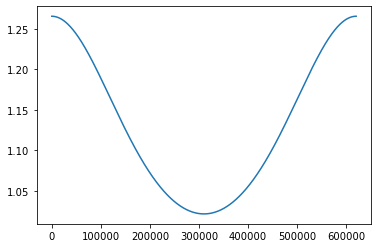

In [380]:
Ri = (N2*(1-gamma)-perts[-1])/(perts[0]**2+(vo/delta-perts[1])**2)
plt.plot(Ri)

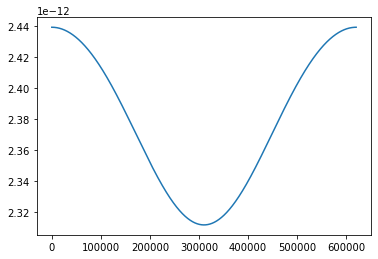

In [381]:
PV_t = (f-theta*(vo/delta-perts[1]))*(N2*(1-gamma)-perts[-1])-(vo/delta-perts[1])*N2*theta*gamma
plt.plot(PV_t)

Note that under our definition of $\gamma$ this reduces to 
$$\omega_{\text{min}}=f\sqrt{\delta}$$
which we can verify as

In [312]:
omega_min_delta = (theta*vo*f/(gamma))**(0.5)
omega_min_delta

5e-06

In [313]:
omega_min_delta = f*Sinf*(delta)**(0.5)
omega_min_delta

5e-06

In [ ]:
j = np.where(t==round(0.25*(2*np.pi)/fstar,1))[0]
t[j[0]]

In [ ]:
N2

In [ ]:
def x2x1(i,perts):
    return (1-gamma)*h/theta + perts[2][i]*h/(N2*theta)

In [ ]:
def angle(i,perts):
    return np.arctan(h/x2x1(i,perts))

In [ ]:
np.pi - angle(j,perts)

In [ ]:
k = np.where(t==round(0.5*(2*np.pi)/fstar,1))
t[k[0]]

In [ ]:
amax = (angle(k,perts)-angle(j,perts))[0]
amax

In [ ]:
intlphi = np.pi -angle(j,perts)

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),perts[1])

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),perts[2])

In [ ]:
np.sin(intlphi)+N2*theta*f*vo/fstar*(np.cos(fstar*np.pi/(2*fstar))-1)*h

In [ ]:
np.sin(intlphi)

In [ ]:
plt.plot(t*(fstar)/(2*np.pi),N2*theta*f*vo/fstar*np.cos(fstar*t)+np.cos(intlphi))

In [ ]:
q = (np.sin(intlphi))**(-1)*(2*fstar**2*1e-8)/(1e-8*(f*vo*np.sqrt(2)+fstar*vo+fstar*N2**(0.5)*gamma*Sinf))
q

In [ ]:
2*fstar/np.pi*np.log(q)

In [ ]:
uma = max(perts[0])
vma = max(perts[1])
bma = max(perts[2])
print(f"u max{uma}")
print(f"v max{vma}")
print(f"b max{bma}")

In [ ]:
umi = min(perts[0])
vmi = min(perts[1])
bmi = min(perts[2])
print(f"u min{umi}")
print(f"v min{vmi}")
print(f"b min{bmi}")

In [ ]:
plt.plot(perts[0],perts[1])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,0,vma,colors="k")
plt.gca().set_aspect('equal')

In [ ]:
plt.plot(perts[0],perts[2])
plt.hlines(0,umi,uma,colors="k")
plt.vlines(0,bmi,bma,colors="k")

In [ ]:
plt.plot(perts[2])
# plt.gca().set_aspect('equal')

In [ ]:
z = np.arange(0,h+1,1)
# plt.plot(vprofile,z,color="r")
vprofile = Vinf-gamma*theta*N2/f*(h-z)
plt.plot(vprofile,z,color="b")
plt.plot(vprofile+perts[1][-1]*(h-z),z,c="y")
# plt.ylim([0,1])

In [ ]:
# plt.plot(vprofile,z,color="r")
uprofile = h*uo*np.ones(np.size(z))
# plt.plot(uprofile,z,color="b")
plt.plot(perts[0][0]*(h-z),z,c="y")
plt.vlines(0,0,h)
# plt.ylim([0,1])

In [ ]:
gamma1
Sinf21

In [ ]:
bint = N2*(h+z)+N2*theta*100
bprofile = N2*z+gamma*N2*(h-z)+N2*theta*100
plt.plot(bint,z+h,"y")
plt.plot(bprofile,z,c="b")
plt.plot(bprofile+perts[2][15515]*(h-z),z,c="r")
# plt.ylim([99,111])

In [ ]:
PV = f*N2*(1-gamma)-(N2**2*theta**2*gamma)/f+N2*theta*vo-f*bo
# omega_min = np.sqrt(PV/N2)
PV

In [ ]:
fstar

In [ ]:
np.Im